# **1. Perkenalan Dataset**


## Penjelasan Dataset: Extrovert vs. Introvert Behavior Data

### Deskripsi Dataset

Dataset **Extrovert vs. Introvert Behavior Data** merupakan kumpulan data perilaku sosial yang dirancang untuk mengeksplorasi karakteristik kepribadian manusia, khususnya pada spektrum **ekstrovert** dan **introvert**. Dataset ini menyediakan indikator-indikator kunci yang dapat digunakan untuk memprediksi kecenderungan kepribadian seseorang.

### Rincian Dataset

- **Jumlah data**: 2.900 baris (observasi), 8 kolom (fitur).
- **Format**: CSV
- **Lisensi**: CC BY-SA 4.0 (bebas digunakan dengan atribusi)
- **Kualitas data**: Mengandung beberapa missing values (kosong) pada fitur-fitur tertentu seperti `Time_spent_Alone` dan `Going_outside`, sehingga memberikan kesempatan untuk praktik data preprocessing.

### Fitur dalam Dataset

| Fitur | Deskripsi | Tipe Data |
|---|---|---|
| `Time_spent_Alone` | Waktu yang dihabiskan sendirian per hari (0-11 jam) | Numerik |
| `Stage_fear` | Memiliki ketakutan berbicara di depan umum (Yes/No) | Kategorikal |
| `Social_event_attendance` | Frekuensi menghadiri acara sosial (0-10) | Numerik |
| `Going_outside` | Frekuensi keluar rumah (0-7) | Numerik |
| `Drained_after_socializing` | Merasa lelah setelah bersosialisasi (Yes/No) | Kategorikal |
| `Friends_circle_size` | Jumlah teman dekat (0-15) | Numerik |
| `Post_frequency` | Frekuensi memposting di media sosial (0-10) | Numerik |
| `Personality` | Label target: Ekstrovert atau Introvert | Kategorikal (target) |

### Pentingnya Dataset Ini

1. **Untuk Penelitian Psikologi dan Sosial**
   - Dataset ini menyediakan data nyata terkait perilaku sosial yang berkaitan dengan ciri kepribadian, sangat relevan untuk penelitian psikologi, sosiologi, dan ilmu sosial.

2. **Untuk Pembelajaran Machine Learning**
   - Dataset ini sangat cocok untuk melatih model klasifikasi, khususnya prediksi tipe kepribadian.
   - Adanya missing value memungkinkan kita untuk melatih kemampuan data preprocessing seperti:
     - **Imputasi data**
     - **Encoding variabel kategorikal**
     - **Feature engineering**
   - Dataset yang relatif seimbang antara kelas introvert dan ekstrovert membantu dalam pembuatan model prediksi yang tidak bias.

3. **Untuk Prediksi dan Analisis**
   - Dengan memanfaatkan dataset ini, kita dapat membangun model prediksi untuk mengklasifikasikan kepribadian seseorang berdasarkan perilaku sosialnya.
   - Bisa digunakan untuk:
     - Analisis hubungan antara perilaku sosial dengan kepribadian.
     - Visualisasi pola perilaku sosial.
     - Praktik exploratory data analysis (EDA).


# **2. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [37]:
data_df= pd.read_csv('personality_dataset.csv')
data_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Check Summary

In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [39]:
data_df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [40]:
data_df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


## Check Missing Value

In [41]:
data_df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

## Check Duplicated Data

In [42]:
data_df.duplicated().sum()

np.int64(388)

In [43]:
numerical_columns = [x for x in data_df.select_dtypes(include='number').columns if x != 'instant']
numerical_columns

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

In [44]:
categorical_columns = [x for x in data_df.select_dtypes(exclude='number').columns]
categorical_columns

['Stage_fear', 'Drained_after_socializing', 'Personality']

## Unvariate

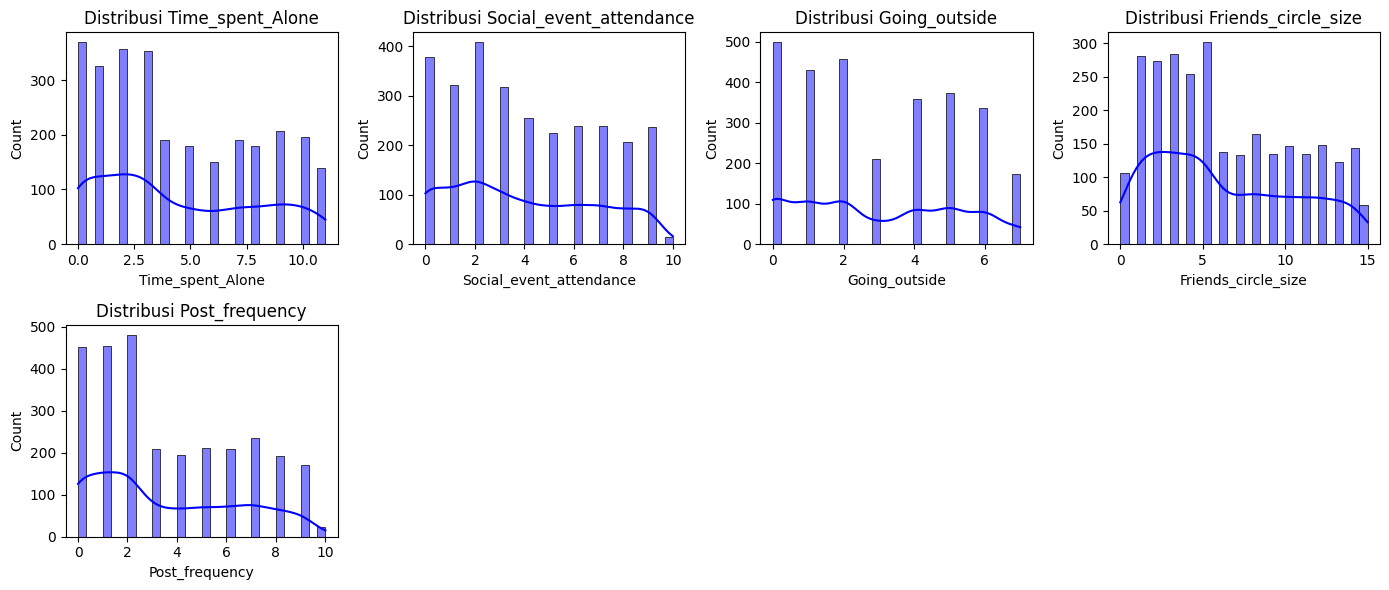

In [45]:
num_cols = len(numerical_columns)
rows = math.ceil(num_cols / 4)  

plt.figure(figsize=(14, rows * 3))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, 4, i) 
    sns.histplot(data_df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

C:\Users\M Fathurrahman\AppData\Local\Temp\ipykernel_22544\3637230385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x=col, palette='Set2')
C:\Users\M Fathurrahman\AppData\Local\Temp\ipykernel_22544\3637230385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x=col, palette='Set2')
C:\Users\M Fathurrahman\AppData\Local\Temp\ipykernel_22544\3637230385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x=col, palette='Set2')


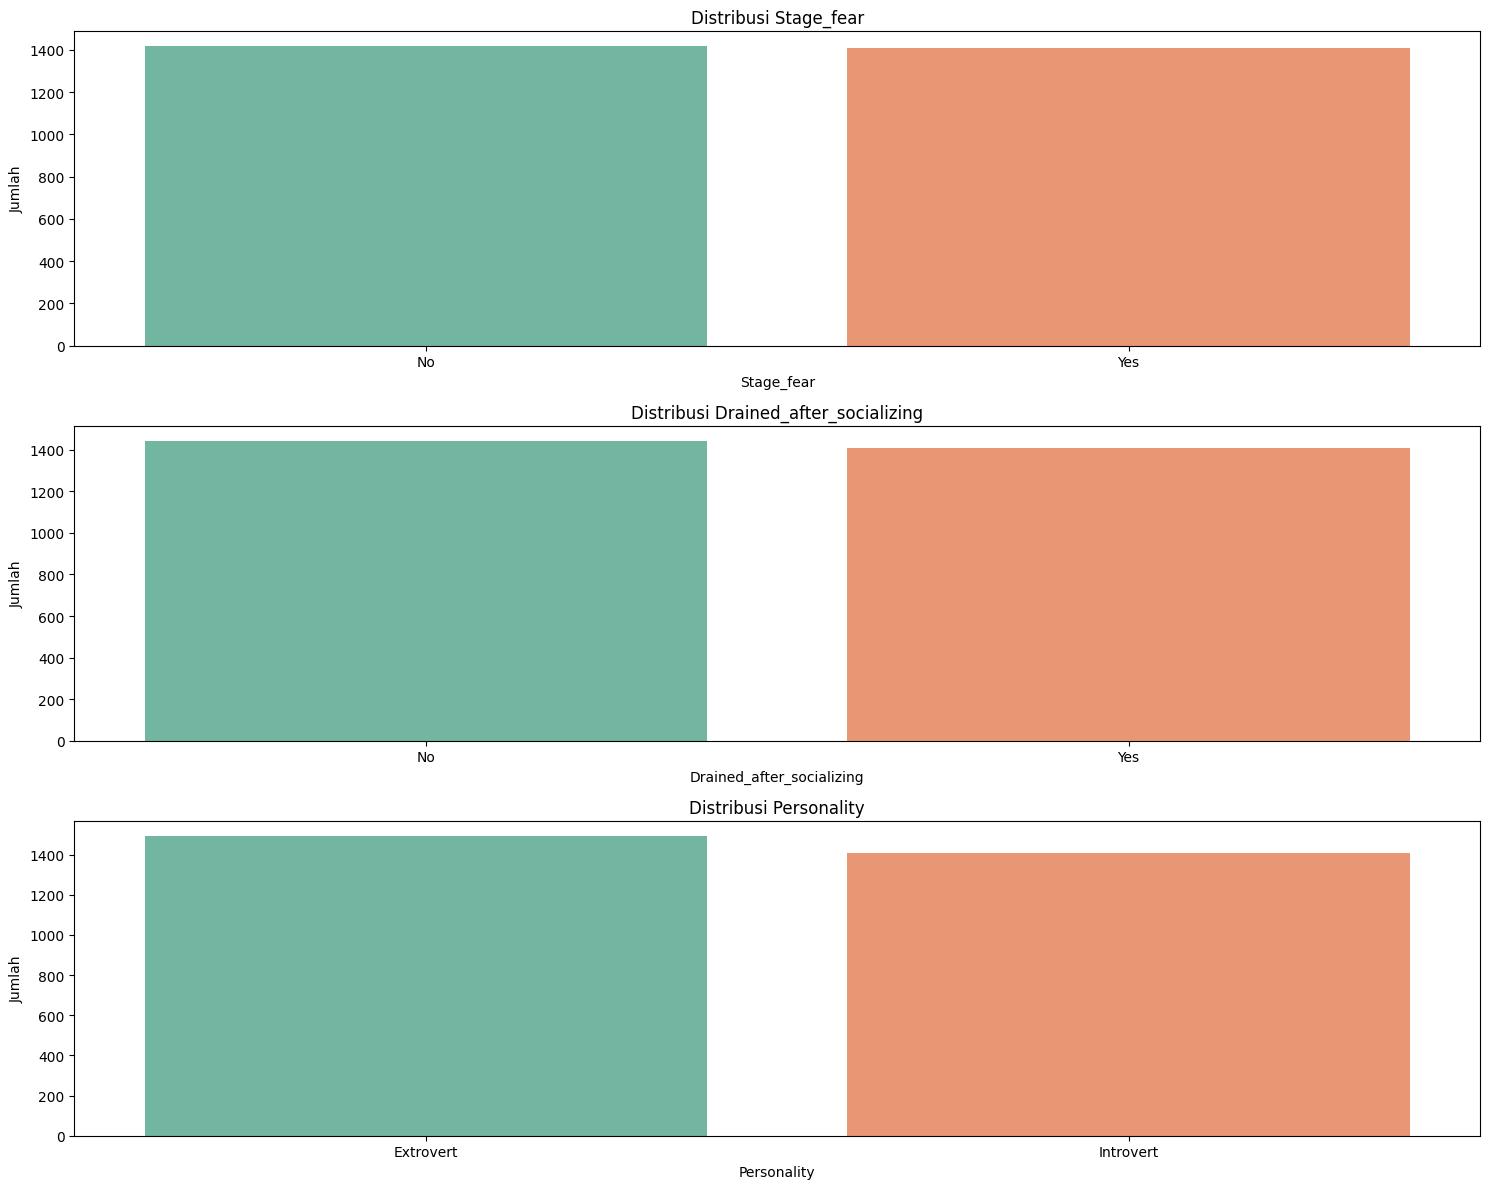

In [46]:
plt.figure(figsize=(15, 4 * len(categorical_columns)))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=data_df, x=col, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
plt.show()

## Multivariate


C:\Users\M Fathurrahman\AppData\Local\Temp\ipykernel_22544\1960931244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x='Personality', y=col, palette='Set2')
C:\Users\M Fathurrahman\AppData\Local\Temp\ipykernel_22544\1960931244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x='Personality', y=col, palette='Set2')
C:\Users\M Fathurrahman\AppData\Local\Temp\ipykernel_22544\1960931244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x='Personality', y=col, palette='Set2')
C:\Users\M Fathurra

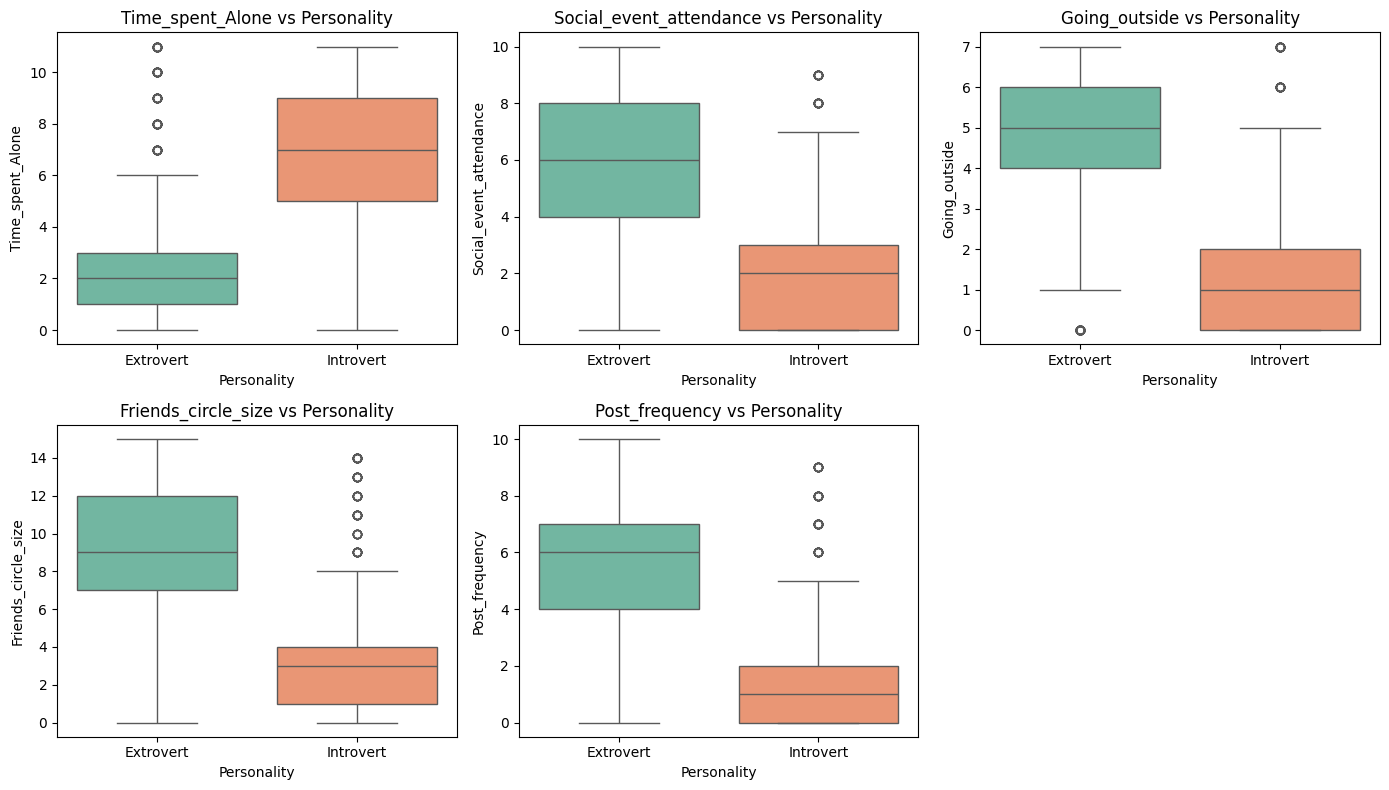

In [47]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, math.ceil(len(numerical_columns)/2), i)
    sns.boxplot(data=data_df, x='Personality', y=col, palette='Set2')
    plt.title(f'{col} vs Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

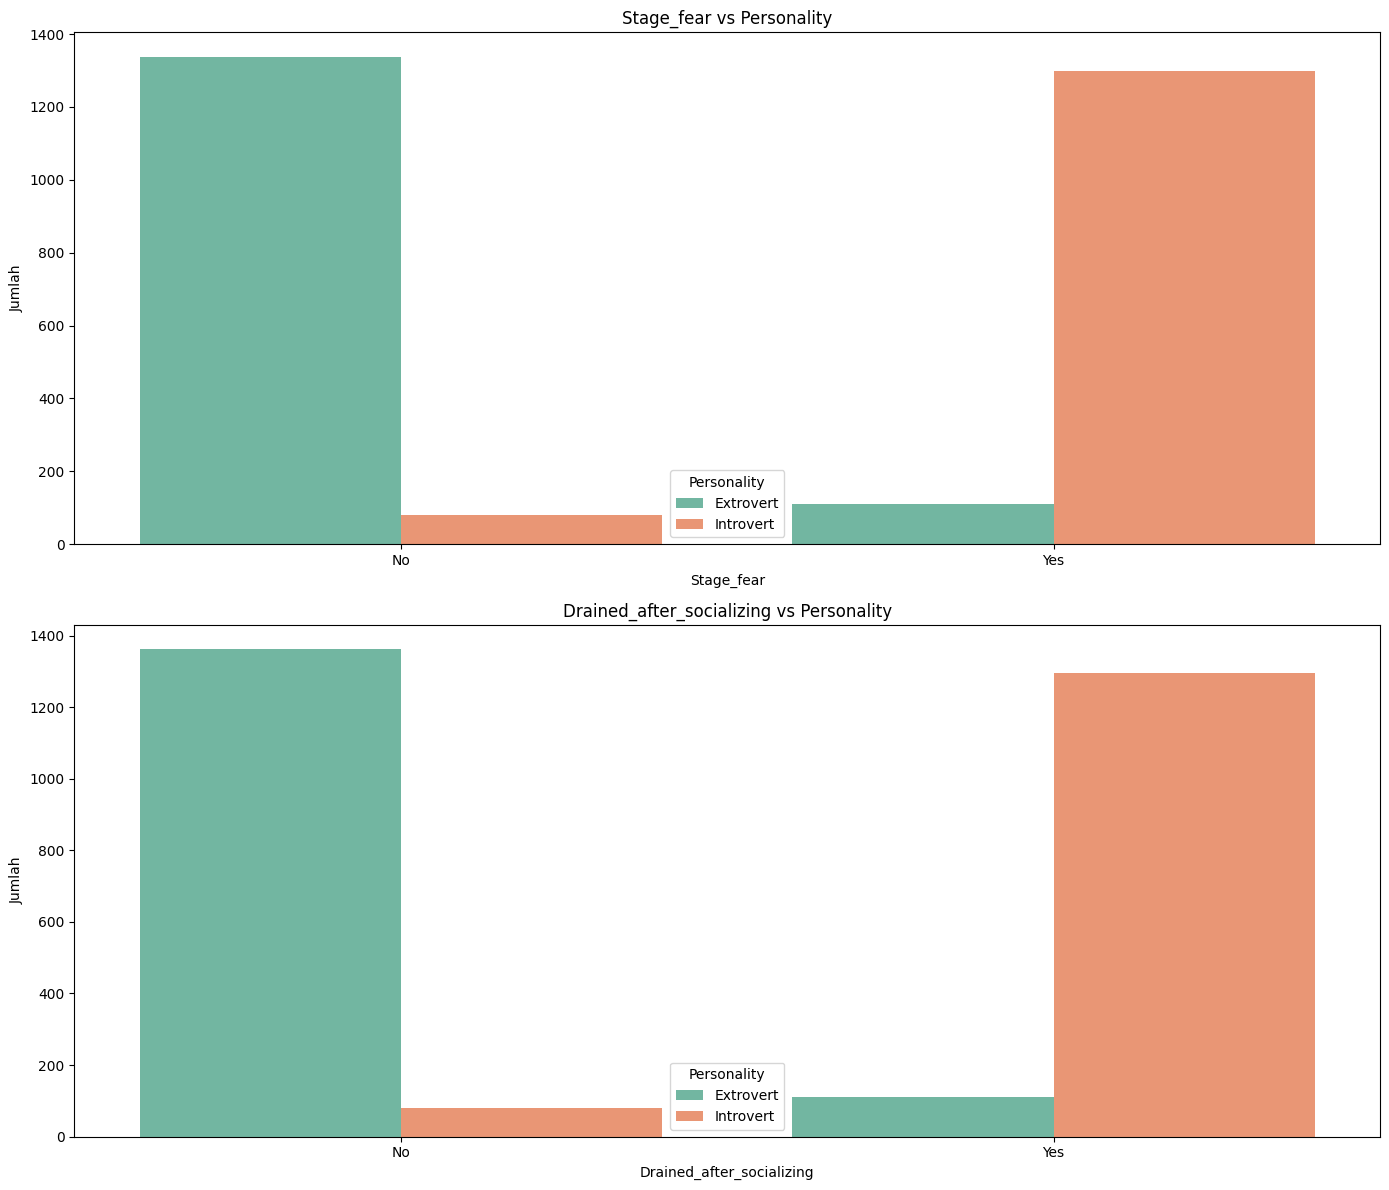

In [48]:
plt.figure(figsize=(14, 4 * len(categorical_columns)))
for i, col in enumerate([c for c in categorical_columns if c != 'Personality'], 1):
    plt.subplot(len(categorical_columns)-1, 1, i)
    sns.countplot(data=data_df, x=col, hue='Personality', palette='Set2')
    plt.title(f'{col} vs Personality')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.legend(title='Personality')
    plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menangani Missing Value

In [ ]:
def hapus_missing_value(data_df):
    return data_df.dropna()

## Menangani Duplicated Data

In [ ]:
def hapus_duplikat(data_df):
    return data_df.drop_duplicates()

## Deteksi dan Penanganan Outlier


In [ ]:
def deteksi_outlier_iqr(data_df, kolom):
    Q1 = data_df[kolom].quantile(0.25)
    Q3 = data_df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_idx = data_df[(data_df[kolom] < lower_bound) | (data_df[kolom] > upper_bound)].index.tolist()
    outlier_count = len(outlier_idx)
    outlier_rows = data_df.loc[outlier_idx]

    summary = {
        'jumlah_outlier': outlier_count,
        'indeks_outlier': outlier_idx
    }
    return summary, outlier_rows

In [ ]:
def minmax_scaler(data_df, columns):
    scaler = MinMaxScaler()
    df_scaled = data_df.copy()
    df_scaled[columns] = scaler.fit_transform(data_df[columns])
    return df_scaled

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    df_encoded = df.copy()
    encoders = {}
    for col in columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoders[col] = le
    return df_encoded, encoders

In [55]:
# 1. Hapus missing value
data_clean = hapus_missing_value(data_df)

# 2. Hapus duplikat
data_clean = hapus_duplikat(data_clean)

# 3. Deteksi outlier untuk setiap kolom numerik
outlier_summary = {}
outliers = pd.DataFrame(columns=data_clean.columns)
for col in numerical_columns:
    summary, outlier_rows = deteksi_outlier_iqr(data_clean, col)
    outlier_summary[col] = summary
    if not outlier_rows.empty:
        outliers = pd.concat([outliers, outlier_rows])

# 4. Normalisasi Min-Max pada kolom numerik
data_scaled = minmax_scaler(data_clean, numerical_columns)

# 5. Encoding kolom kategorikal
data_encoded, encoders = encode_categorical_columns(data_scaled, categorical_columns)

# Tampilkan hasil akhir
data_encoded.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.363636,0,0.4,0.857143,0,0.866667,0.5,0
1,0.818182,1,0.0,0.000000,1,0.000000,0.3,1
2,0.818182,1,0.1,0.285714,1,0.333333,0.2,1
3,0.000000,0,0.6,1.000000,0,0.933333,0.8,0
4,0.272727,0,0.9,0.571429,0,0.533333,0.5,0
